In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_peaks_df = pd.read_csv("../07C_annotated_peaks.csv")
all_peaks_df.shape

(654221, 17)

### Get enhancers, using the Spurrell 2022 definition (>1kb nucleotides away from TSS)

In [3]:
enhancer_peak_df = all_peaks_df[np.abs(all_peaks_df['distanceToTSS']) > 1000]
enhancer_peak_df.shape

(566203, 17)

In [4]:
print(f"Proportion of enhancers: {100 * enhancer_peak_df.shape[0] / all_peaks_df.shape[0]}%")

Proportion of enhancers: 86.54613655018717%


### Save in bed format

In [5]:
filt_enhancer_peak_df = enhancer_peak_df[["seqnames", "start", "end"]].reset_index(drop=True)
filt_enhancer_peak_df.to_csv("01_snATAC_enhancer_peaks.bed", header=None, sep = "\t", index=None)

### Convert the Spurrell 2022 enhancer peaks to BED format as well

In [6]:
Spurrell_enhancer_df = pd.read_csv("Spurrell_healthy_enhancers.csv")
Spurrell_enhancer_df.shape

(33317, 5)

In [7]:
Spurrell_enhancer_df

,Chromosome,Start,End,Number of healthy samples with peak (out of 26 total),Overlaps validated VISTA heart enhancer
0,chr1,836153,837500,6,.
1,chr1,864654,866686,12,.
2,chr1,1004411,1006406,7,.
3,chr1,1022693,1026419,2,.
4,chr1,1079279,1081182,12,.
...,...,...,...,...,...
33312,chr22,50612205,50614502,14,.
33313,chr22,50637541,50646017,25,.
33314,chr22,50652258,50661593,26,.
33315,chr22,50683063,50685434,3,.


In [8]:
Spurrell_enhancer_df['length'] = Spurrell_enhancer_df['End'] - Spurrell_enhancer_df['Start']

In [9]:
np.median(Spurrell_enhancer_df['length'])

4244.0

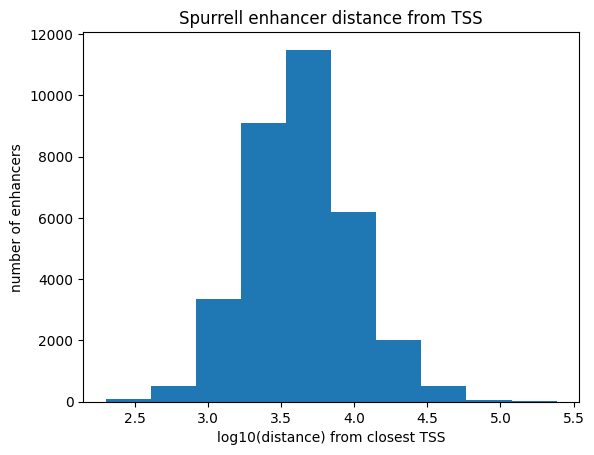

In [12]:
plt.hist(np.log10(Spurrell_enhancer_df['length']))
plt.xlabel("log10(distance) from closest TSS")
plt.ylabel("number of enhancers")
plt.title("Spurrell enhancer distance from TSS")
plt.show()

In [11]:
filt_Spurrell_enhancer_df = Spurrell_enhancer_df[["Chromosome", "Start", "End"]]
filt_Spurrell_enhancer_df.to_csv("Spurrell_healthy_enhancers.bed", header=None, sep = "\t", index=None)